#Decision Tree


C:\Users\raswa\AppData\Local\Temp\ipykernel_10088\2488809093.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', num_classes)
C:\Users\raswa\AppData\Local\Temp\ipykernel_10088\2488809093.py:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


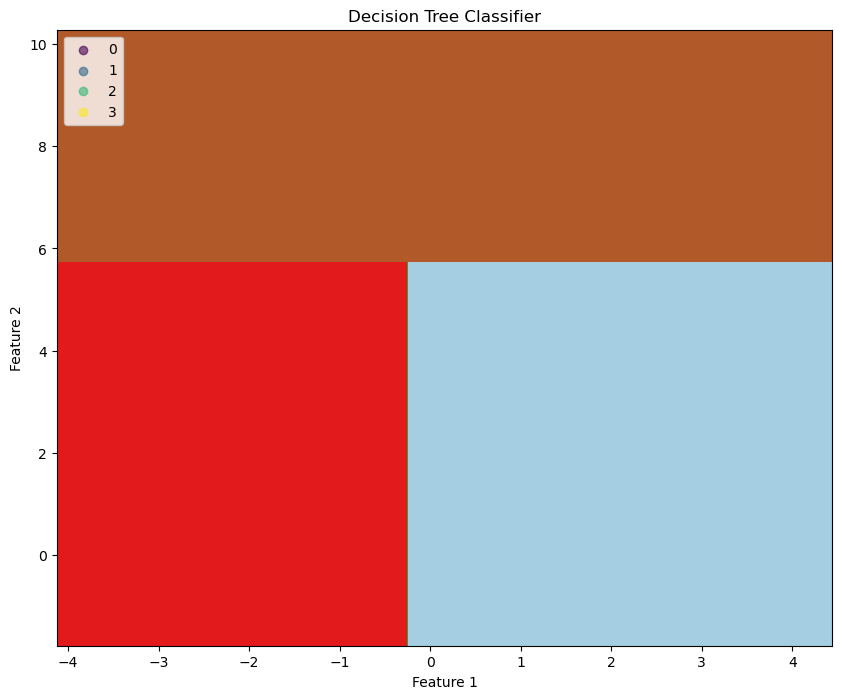

In [11]:
import matplotlib.cm as cm

# Create a sample dataset
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Get the number of unique classes
num_classes = len(np.unique(y))

# Create a colormap with the number of colors equal to the number of classes
cmap = cm.get_cmap('viridis', num_classes)

# Visualize the decision tree
fig, ax = plt.subplots(figsize=(10, 8))
plot_step = 0.02

# Create a mesh to plot the decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

# Plot the data points
for idx, cl in enumerate(np.unique(y)):
    color = cmap(idx / num_classes)
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                c=color, label=cl, alpha=0.6)


Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Tree Classifier")
plt.legend(loc="upper left")
plt.show()

# Export the decision tree as a graphviz file
tree.export_graphviz(clf, out_file="tree.dot", filled=True)



In [12]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.7166666666666667


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy Score (Decision Tree): 0.9833333333333333
Accuracy Score (Random Forest): 0.9833333333333333


C:\Users\raswa\AppData\Local\Temp\ipykernel_10088\261184439.py:61: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', num_classes)
C:\Users\raswa\AppData\Local\Temp\ipykernel_10088\261184439.py:72: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


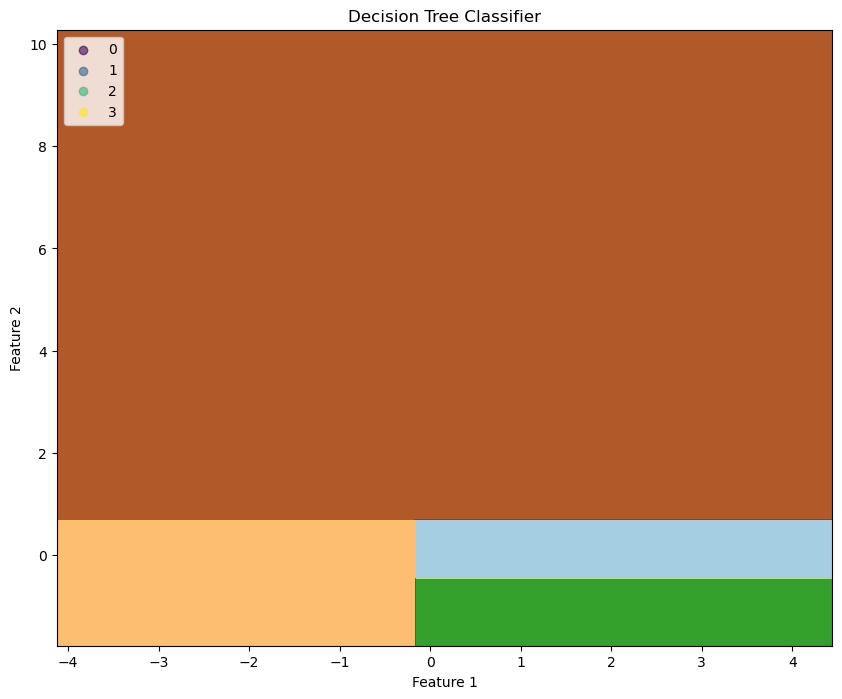

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Create a sample dataset
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a decision tree classifier with hyperparameter tuning
clf = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5)

# Fit the classifier to the training data
clf.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print("Best Parameters:", clf.best_params_)

# Make predictions on the test data
y_pred = clf.predict(X_test_scaled)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score (Decision Tree):", accuracy)

# Try Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train_scaled, y_train)
rf_y_pred = rf_clf.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Accuracy Score (Random Forest):", rf_accuracy)

# Visualize the decision boundaries and data points
fig, ax = plt.subplots(figsize=(10, 8))
plot_step = 0.02

# Get the number of unique classes
num_classes = len(np.unique(y))

# Create a colormap with the number of colors equal to the number of classes
cmap = cm.get_cmap('viridis', num_classes)

# Create a mesh to plot the decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

# Plot the data points
for idx, cl in enumerate(np.unique(y)):
    color = cmap(idx / num_classes)
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                c=color, label=cl, alpha=0.6)

# Plot the decision boundaries
Z = clf.best_estimator_.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Tree Classifier")
plt.legend(loc="upper left")
plt.show()